In [1]:
import qutip as qt
import numpy as np
import scipy as sp
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
#plt.switch_backend('agg')
import matplotlib.gridspec as gridspec
import itertools
import time
import scipy.integrate as integrate
import scipy.optimize as opt
from tabulate import tabulate
from scipy.special import eval_laguerre

In [2]:
data_spec=np.genfromtxt('spectrum.txt', skip_header=1)

In [3]:
data_spec.shape

(30, 201)

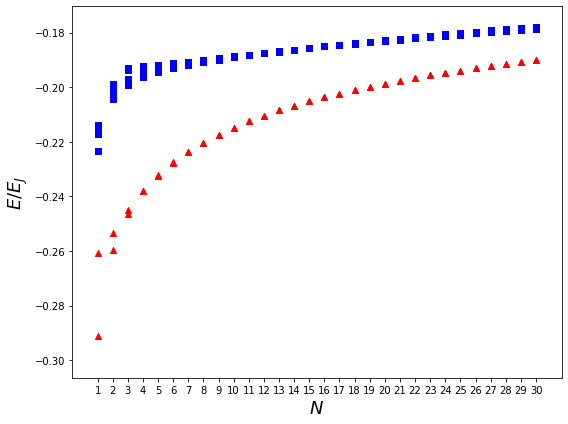

In [4]:
NMax=30
Emax=5
fontsize=18

fig=plt.figure("spectrum", figsize=(8,6))
for i in range(Emax+1):
    if i<=1:
        plt.scatter(data_spec[:NMax,0],data_spec[:NMax,i+1], c='r', marker='^')
    else:
        plt.scatter(data_spec[:NMax,0],data_spec[:NMax,i+1], c='b', marker='s')
    
plt.xlabel(r"$N$", fontsize=fontsize)
plt.ylabel(r"$E/E_J$", fontsize=fontsize)
plt.xticks(data_spec[:NMax,0], ["%i"%(i) for i in data_spec[:NMax,0]])
plt.tight_layout()
plt.savefig('spectrum.pdf')

In [15]:
data_Dp=np.genfromtxt('Delta_p.txt', skip_header=1)
data_Dq=np.genfromtxt('Delta_q.txt', skip_header=1)

In [16]:
NRANGE=np.asarray(range(len(data_Dq[0,1:])))

def f(x,p, fN1):
    return fN1/x**(p[0])

pull=lambda p,x,y, fN1: y-f(x,p, fN1)
params_q,cov,info,mess,ierr=opt.leastsq(pull,[0.185],args=(NRANGE,data_Dq[i,1:],data_Dq[i,1] ),full_output=True)
params_p,cov,info,mess,ierr=opt.leastsq(pull,[0.185],args=(NRANGE,data_Dp[i,1:], data_Dp[i,1]),full_output=True)
    

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


In [28]:
params_p, params_q

(array([0.185]), array([0.185]))

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


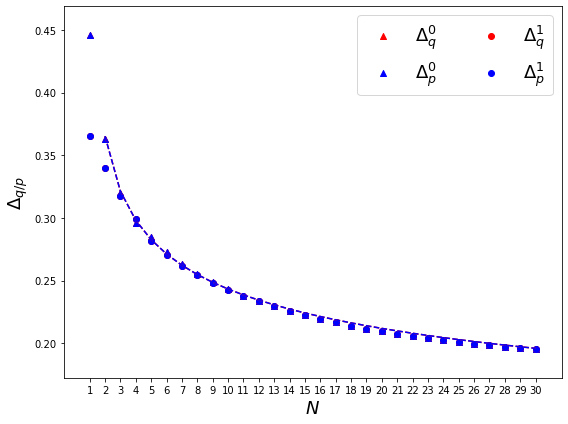

In [26]:
colors=['r','b']
markers=['^','o']

fontsize=18

fig=plt.figure("Delta_qp", figsize=(8,6))

for i in range(2):
    plt.scatter(NRANGE, data_Dq[i,1:],c='r', marker=markers[i], label='$\Delta_q^{%i}$'%(i))
    plt.scatter(NRANGE, data_Dp[i,1:],c='b', marker=markers[i], label='$\Delta_p^{%i}$'%(i))
    
plt.plot(f(NRANGE,params_q,data_Dq[i,1]), 'r--')
plt.plot(f(NRANGE,params_p,data_Dp[i,1]), 'b--')

plt.xlabel(r"$N$",fontsize=fontsize)
plt.ylabel(r"$\Delta_{q/p}$", fontsize=fontsize)
plt.xticks(NRANGE, ["%i"%(j+1) for j in NRANGE])
plt.legend(ncol=2, fontsize=fontsize)
plt.tight_layout()
plt.savefig("deltas.pdf")

    #plt.clf()
    #plt.cla()